# Ejemplo 2: Random forest

In [25]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
# Carga un conjunto de datos (en este caso, el conjunto de datos Iris)
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X = iris.data  # Características
y = iris.target  # Etiquetas

In [ ]:
# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crea un modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf

RandomForestClassifier(random_state=42)

In [ ]:
# Entrena el modelo en el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Realiza predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

In [ ]:
# Calcula la precisión del modelo en el conjunto de prueba
precision = accuracy_score(y_test, predicciones)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

# Realiza validación cruzada con 5-fold cross-validation para obtener una estimación más robusta de la precisión
scores = cross_val_score(modelo_rf, X, y, cv=5)
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

Precisión del modelo en el conjunto de prueba: 1.00
Precisión de validación cruzada: 0.97 (+/- 0.04)


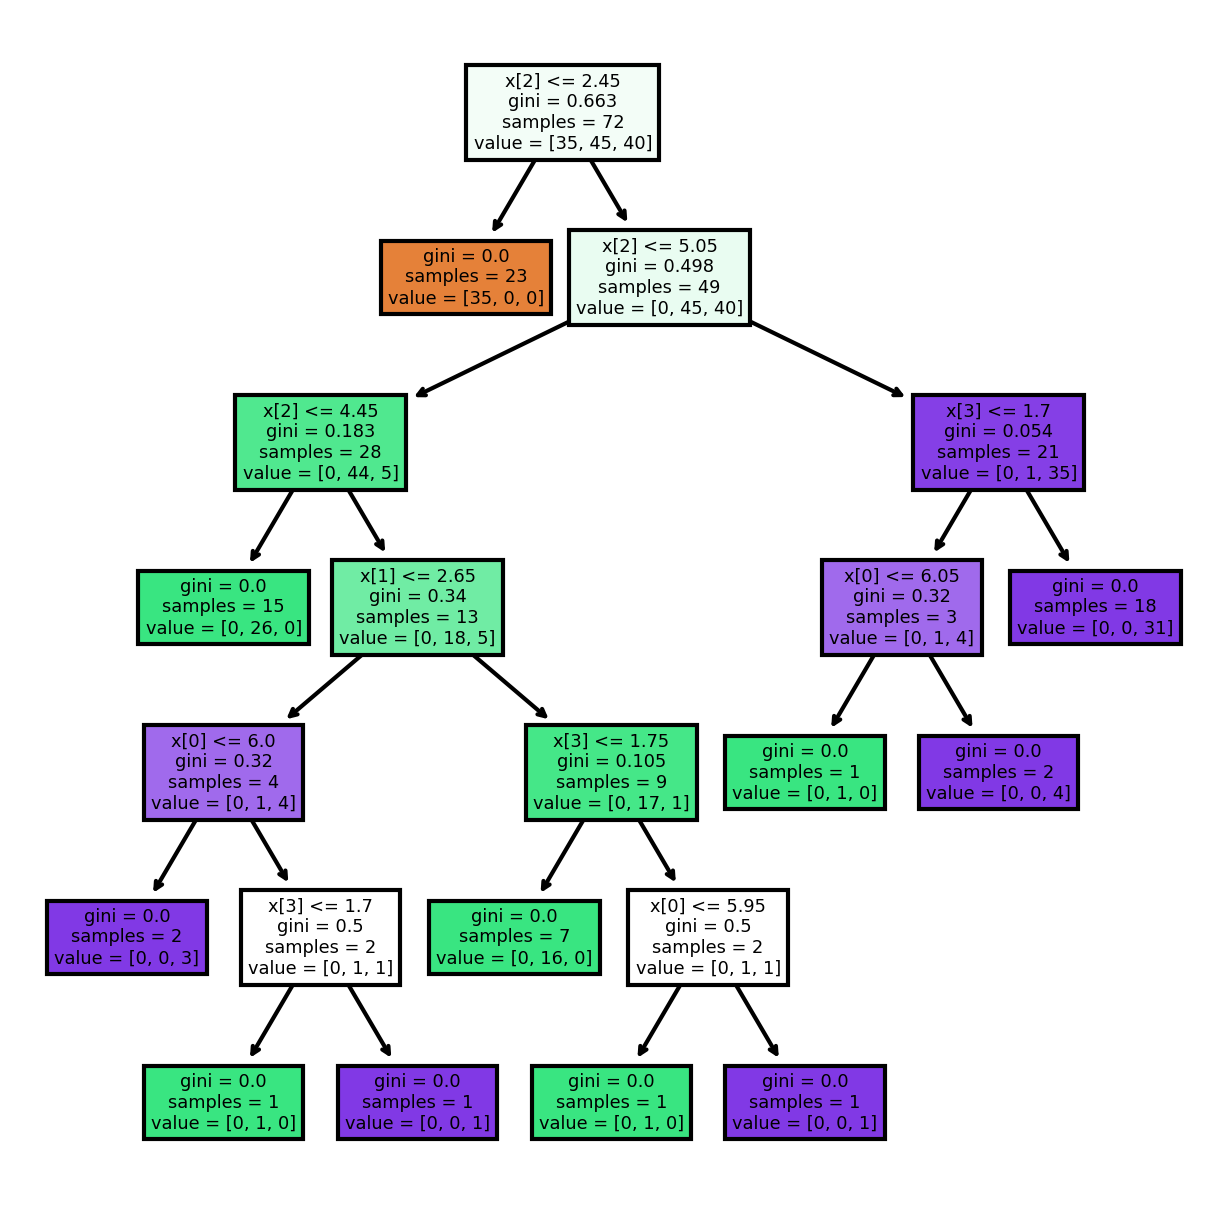

In [26]:
numeroArbol = 18
arbolDelBosque = modelo_rf.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi = 300)
tree.plot_tree(arbolDelBosque,filled = True);
plt.show()